<a href="https://colab.research.google.com/github/hameedk1/Comprehensive-Assessment-_Machine-Learning/blob/main/Comprehensive_Assessment_Deep_Learning_Predicting_Diabetes_Progression_using_Artificial_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import necessary libraries
from sklearn.datasets import load_diabetes
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the dataset
diabetes_data = load_diabetes()
X, y = diabetes_data.data, diabetes_data.target

In [3]:
#Convert to DataFrame for easy handling
df = pd.DataFrame(X, columns=diabetes_data.feature_names)
df['target'] = y

In [4]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64


In [5]:
# Initialize the scaler
scaler = StandardScaler()

In [6]:
# Normalize the features (excluding the target variable)
X_normalized = scaler.fit_transform(X)  # Make sure to store the output here

In [7]:
# Convert the normalized data back to a DataFrame for further processing if needed
df_normalized = pd.DataFrame(X_normalized, columns=diabetes_data.feature_names)
df_normalized['target'] = y

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt


In [9]:
# Summary statistics
print("Summary Statistics:\n", df_normalized.describe())


Summary Statistics:
                 age           sex           bmi            bp            s1  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean  -8.037814e-18  2.290777e-16  2.009453e-17 -1.607563e-17  8.037814e-18   
std    1.001133e+00  1.001133e+00  1.001133e+00  1.001133e+00  1.001133e+00   
min   -2.254290e+00 -9.385367e-01 -1.897929e+00 -2.363050e+00 -2.665411e+00   
25%   -7.841722e-01 -9.385367e-01 -7.196249e-01 -7.706500e-01 -7.200196e-01   
50%    1.131724e-01 -9.385367e-01 -1.531324e-01 -1.192138e-01 -9.084100e-02   
75%    8.005001e-01  1.065488e+00  6.569519e-01  7.493678e-01  5.961931e-01   
max    2.327895e+00  1.065488e+00  3.585718e+00  2.776058e+00  3.235851e+00   

                 s2            s3            s4          s5            s6  \
count  4.420000e+02  4.420000e+02  4.420000e+02  442.000000  4.420000e+02   
mean   4.018907e-18 -4.018907e-18  2.330966e-16    0.000000 -4.018907e-17   
std    1.001133e+00  1.001133e+00  1

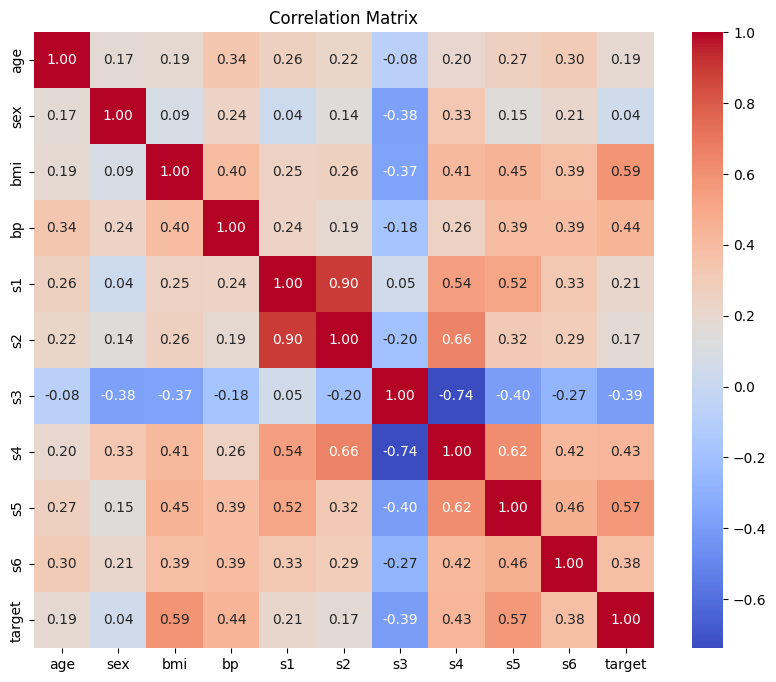

In [10]:
# Correlation matrix
plt.figure(figsize = (10,8))
sns.heatmap(df_normalized.corr(), annot=True, cmap = 'coolwarm', fmt = ".2f")
plt.title("Correlation Matrix")
plt.show()

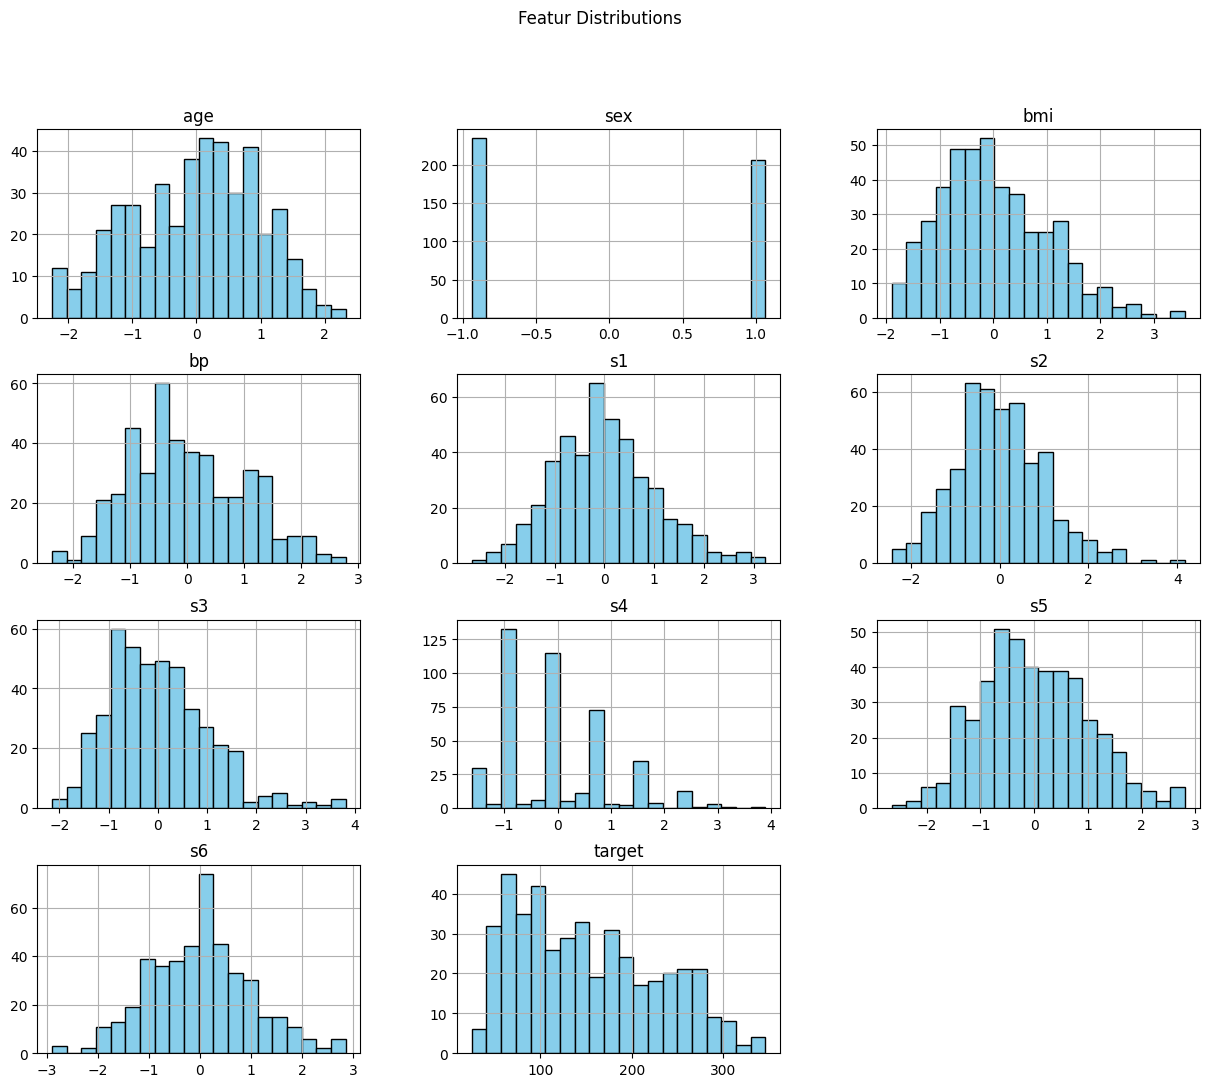

In [11]:
# Histogram of each feature
df_normalized.hist(bins = 20, figsize = (15,12), color = 'skyblue', edgecolor = 'black')
plt.suptitle("Featur Distributions")
plt.show()

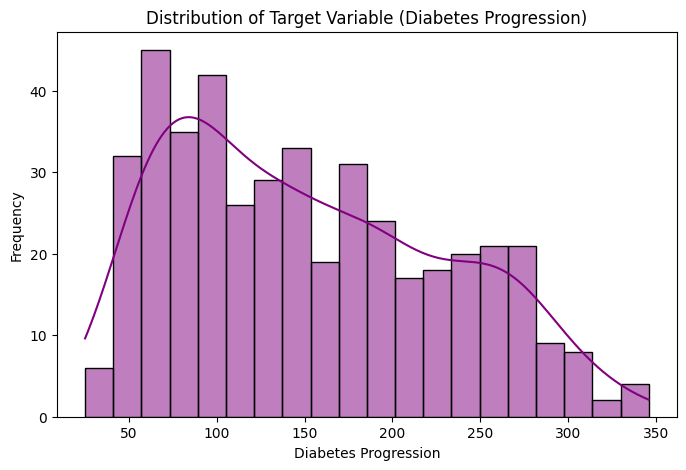

In [12]:
# Distribution of the target variable
plt.figure(figsize=(8, 5))
sns.histplot(df_normalized['target'], kde=True, color='purple', bins=20)
plt.title("Distribution of Target Variable (Diabetes Progression)")
plt.xlabel("Diabetes Progression")
plt.ylabel("Frequency")
plt.show()

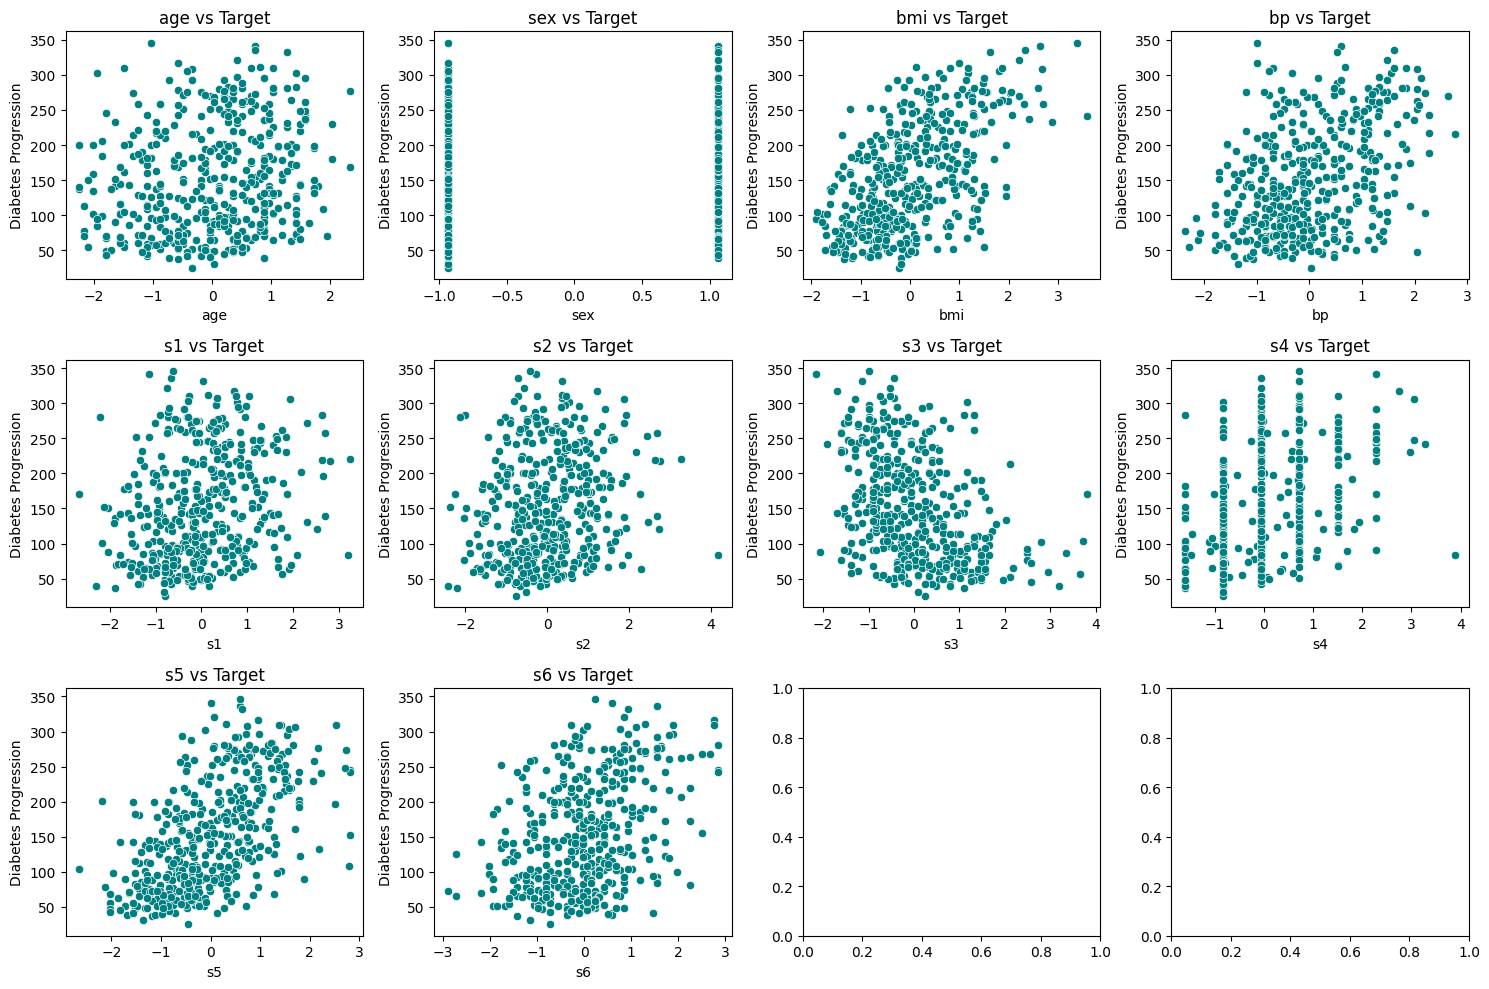

In [13]:
# Scatter plots of each feature vs. target
fig, axes = plt.subplots(3, 4, figsize=(15, 10))
axes = axes.ravel()

for idx, col in enumerate(df_normalized.columns[:-1]):  # exclude the target column
    sns.scatterplot(x=df_normalized[col], y=df_normalized['target'], ax=axes[idx], color='teal')
    axes[idx].set_title(f"{col} vs Target")
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel("Diabetes Progression")

plt.tight_layout()
plt.show()

In [14]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split

In [15]:
# Splitting the data
X = df_normalized.drop(columns=['target']).values
y = df_normalized['target'].values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# Define the ANN model
model = Sequential()

# Input layer and first hidden layer
model.add(Dense(units=64, activation='relu', input_shape=(X_train.shape[1],)))  # 64 neurons, can be adjusted

# Optional: Additional hidden layer (you can add more layers if needed)
model.add(Dense(units=32, activation='relu'))  # 32 neurons

# Output layer for regression (no activation function here)
model.add(Dense(units=1))

# Model summary to review architecture
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,817 (11.00 KB)

 Trainable params: 2,817 (11.00 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])  # MAE as an additional metric

In [18]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 29936.9238 - mae: 155.4612 - val_loss: 22279.2852 - val_mae: 133.2774
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 31031.5781 - mae: 157.2403 - val_loss: 22135.1406 - val_mae: 132.7505
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 31493.3301 - mae: 158.8547 - val_loss: 21957.9004 - val_mae: 132.1084
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 32656.3594 - mae: 161.6324 - val_loss: 21735.5566 - val_mae: 131.3082
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 30130.3359 - mae: 154.8437 - val_loss: 21466.0254 - val_mae: 130.3356
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 30092.2461 - mae: 153.3052 - val_loss: 21129.8281 - val_mae: 129.1309
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 30157.9746 - mae: 153.6340 - val_loss: 20720.3652 - val_mae: 127.6654
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 29039.0000 - mae: 151.7169 - val_loss: 20220.5156 - v

In [19]:
# Model evaluation
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=1)
print(f"Test MSE: {test_loss:.4f}, Test MAE: {test_mae:.4f}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3086.1938 - mae: 43.7294  
Test MSE: 2868.4521, Test MAE: 42.0013


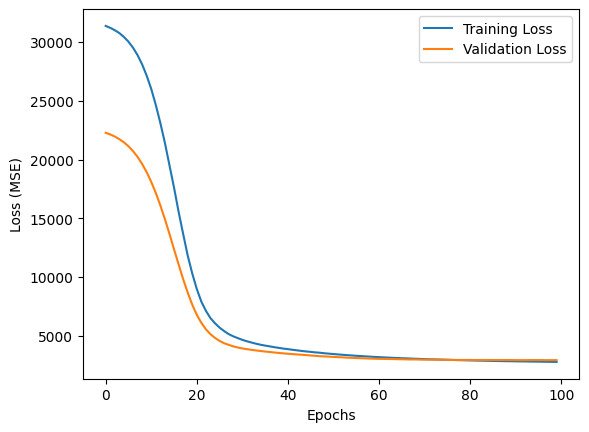

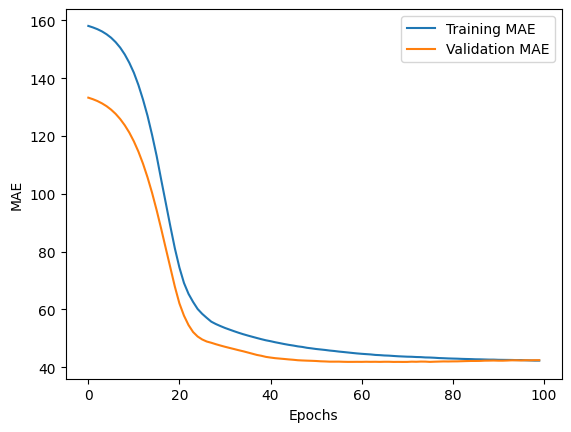

In [21]:
import matplotlib.pyplot as plt

# Plot training & validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.show()

# Plot training & validation MAE
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

In [22]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [23]:
# Assuming X and y are your feature matrix and target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))  # Hidden layer with 64 nodes
model.add(Dense(32, activation='relu'))  # Another hidden layer (optional)
model.add(Dense(1))  # Output layer for regression

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [25]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])

In [26]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1, verbose=1)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 32009.1523 - mse: 32009.1523 - val_loss: 27381.0996 - val_mse: 27381.0996
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 31090.9258 - mse: 31090.9258 - val_loss: 27215.2715 - val_mse: 27215.2715
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 27345.8965 - mse: 27345.8965 - val_loss: 27011.3633 - val_mse: 27011.3633
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 31611.3945 - mse: 31611.3945 - val_loss: 26755.0078 - val_mse: 26755.0078
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 28999.4023 - mse: 28999.4023 - val_loss: 26432.4355 - val_mse: 26432.4355
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 26852.4141 - mse: 26852.4141 - val_loss: 26026.4824 - val_mse: 26026.4824
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 28393.5332 - mse: 28393.5332 - val_loss: 25511.1426 - val_mse: 25511.1426
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 26058.656

In [27]:
#Evaluate the Model on Test Data
y_pred = model.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Mean Squared Error (MSE): 2954.325134015624
R² Score: 0.44238570840429625


In [28]:
model_improved = Sequential()
model_improved.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model_improved.add(Dense(64, activation='relu'))
model_improved.add(Dense(32, activation='relu'))
model_improved.add(Dense(1))  # Output layer for regression

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [29]:
from tensorflow.keras.layers import LeakyReLU

model_improved = Sequential()
model_improved.add(Dense(128, input_dim=X_train.shape[1]))
model_improved.add(LeakyReLU(alpha=0.1))  # Leaky ReLU for hidden layers
model_improved.add(Dense(64, activation='tanh'))
model_improved.add(Dense(1))  # Output layer

/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [30]:
from tensorflow.keras.optimizers import Adam

model_improved.compile(optimizer=Adam(learning_rate=0.001),  # Reduced learning rate
                       loss='mean_squared_error',
                       metrics=['mse'])

In [31]:
from tensorflow.keras.layers import Dropout

model_improved = Sequential()
model_improved.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model_improved.add(Dropout(0.3))  # Dropout to prevent overfitting
model_improved.add(Dense(64, activation='relu'))
model_improved.add(Dropout(0.3))
model_improved.add(Dense(32, activation='relu'))
model_improved.add(Dense(1))

In [34]:
# Compile the model before fitting it
model_improved.compile(optimizer=Adam(learning_rate=0.001),  # Optimizer with a reduced learning rate
                       loss='mean_squared_error',            # Loss function
                       metrics=['mse'])                      # Metric(s) to evaluate performance

# Now fit the model to the training data
history_improved = model_improved.fit(X_train, y_train, epochs=150, batch_size=32, validation_split=0.1, verbose=1)

# Make predictions and evaluate performance
y_pred_improved = model_improved.predict(X_test)
mse_improved = mean_squared_error(y_test, y_pred_improved)
r2_improved = r2_score(y_test, y_pred_improved)

print(f"Improved Mean Squared Error (MSE): {mse_improved}")
print(f"Improved R² Score: {r2_improved}")

Epoch 1/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 28922.3809 - mse: 28922.3809 - val_loss: 27283.8164 - val_mse: 27283.8164
Epoch 2/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 29045.4551 - mse: 29045.4551 - val_loss: 26816.0684 - val_mse: 26816.0684
Epoch 3/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 28656.8867 - mse: 28656.8867 - val_loss: 25954.1523 - val_mse: 25954.1523
Epoch 4/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 26185.7852 - mse: 26185.7852 - val_loss: 24413.4688 - val_mse: 24413.4688
Epoch 5/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 27039.9570 - mse: 27039.9570 - val_loss: 21744.4805 - val_mse: 21744.4805
Epoch 6/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 21829.3457 - mse: 21829.3457 - val_loss: 17642.1387 - val_mse: 17642.1387
Epoch 7/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 17192.2305 - mse: 17192.2305 - val_loss: 12341.9980 - val_mse: 12341.9980
Epoch 8/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 10490.526